In [1]:
import csv
import pandas as pd
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
def test_data():
    return pd.read_csv('../data/csv/test.csv').dropna()

def macron_data():
    return pd.read_csv('../data/csv/prediction_macron.csv').dropna()

def lepen_data():
    return pd.read_csv('../data/csv/prediction_lepen.csv').dropna()

In [3]:
SIA = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    vader_scores = SIA.polarity_scores(text)
    if vader_scores['compound'] > 0.05:
        return 'pos'
    elif vader_scores['compound'] < -0.05:
        return 'neg'
    return 'neu'

def textblob_sentiment(text):
    textblob_scores = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment
    if textblob_scores[0] > 0.1:
        return 'pos'
    elif textblob_scores[0] < -0.1:
        return 'neg'
    return 'neu'

In [4]:
def apply_classifier(df, classifier):
    df['pred'] = df['text'].apply(classifier)
    return df

## Test VADER and TextBlob accuracy with the Test set

In [5]:
from helper import accuracy

In [6]:
vader_test = apply_classifier(test_data(), vader_sentiment)
textblob_test = apply_classifier(test_data(), textblob_sentiment)

Accuracy: 39.578
Macro F1-score: 39.166


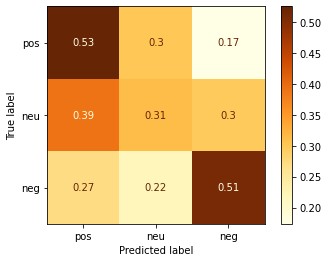

In [7]:
accuracy(vader_test)

Accuracy: 45.781
Macro F1-score: 37.021


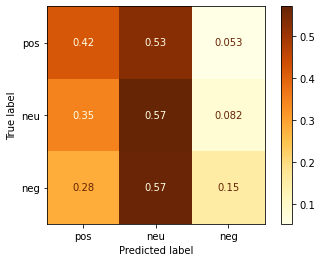

In [8]:
accuracy(textblob_test)

## Predict the winner using VADER and TextBlob

In [9]:
def display(df):
    df = df.groupby('pred').count()
    df['percent'] = ((df['text'] / df['text'].sum()) * 100).round(2)
    return df

#### Macron

In [10]:
macron_vader = apply_classifier(macron_data(), vader_sentiment)
macron_textblob = apply_classifier(macron_data(), textblob_sentiment)

In [11]:
display(macron_vader)

,text,percent
pred,,
neg,600,39.19
neu,414,27.04
pos,517,33.77


In [12]:
display(macron_textblob)

,text,percent
pred,,
neg,185,12.08
neu,909,59.37
pos,437,28.54


#### Le Pen

In [13]:
lepen_vader = apply_classifier(lepen_data(), vader_sentiment)
lepen_textblob = apply_classifier(lepen_data(), textblob_sentiment)

In [14]:
display(lepen_vader)

,text,percent
pred,,
neg,488,31.40
neu,515,33.14
pos,551,35.46


In [15]:
display(lepen_textblob)

,text,percent
pred,,
neg,158,10.17
neu,960,61.78
pos,436,28.06
